# MONIKA'S PROJECT REPORT ON HOUSING:PRICE PREDICTION

Housing:Price Prediction - Project_Work

As According to Given Problem the solution is divided into the following four sections:

I)Data Understanding and Exploration For Data Analysis(EDA)

II)Data Cleaning

III)Data Preparation

IV)Model Building and Evaluation of Data


# i) Exploratory Data Analysis (EDA) With The Given DataSet                                         

Firstly we will to check assumptions with the help of statistical summary and graphical representations and understand the data size,attributes names,values etc. from the provided dataset in the form of CSV file.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# To Scale our data
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import r2_score


# hide warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)


%matplotlib inline

In [2]:
# Read the dataset
dp = pd.read_csv("train.csv")
dp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [3]:
dp

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,BrkFace,31.0,TA,Gd,CBlock,TA,TA,No,BLQ,450,Unf,0,432,882,GasA,TA,Y,SBrkr,900,0,0,900,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1970.0,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,4,5,1949,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1126,0,0,1126,0,0,2,0,2,1,Gd,5,Typ,0,NaN,Detchd,2002.0,Fin,2,520,TA,TA,N,0,96,0,0,0,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,6,6,1976,1976,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,566,Unf,0,289,855,GasA,TA,Y,SBrkr,855,601,0,1456,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1976.0,Unf,2,440,TA,TA,Y,87,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,Ga

In [4]:
dp.shape

(1168, 81)

In [5]:
dp.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [6]:
dp.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Summary Statistics

In [7]:
dp.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1104.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,46.647260,569.721747,1061.095034,1169.860445,348.826199,6.380137,1525.066781,0.425514,0.055651,1.562500,0.388699,2.884418,1.045377,6.542808,0.617295,1978.193841,1.776541,476.860445,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,163.520016,449.375525,442.272249,391.161983,439.696370,50.892844,528.042957,0.521615,0.236699,0.551882,0.504929,0.817229,0.216292,1.598484,0.650575,24.890704,0.745554,214.466769,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,216.000000,799.000000,892.000000,0.000000,0.000000,1143.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,0.000000,0.000000,1468.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,729.000000,0.000000,1795.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Plotting Outliers

<AxesSubplot:>

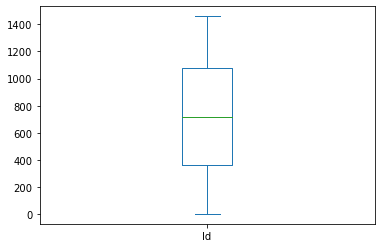

In [8]:
#univariate analysis
dp['Id'].plot.box()

<AxesSubplot:>

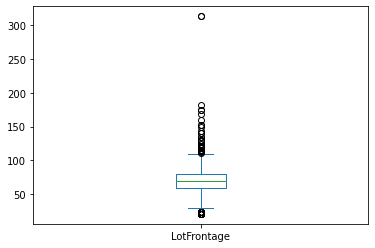

In [9]:
#univariate analysis
dp['LotFrontage'].plot.box()

<AxesSubplot:>

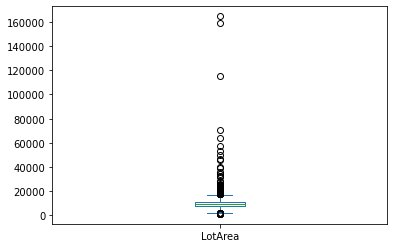

In [10]:
#univariate analysis
dp['LotArea'].plot.box()

<AxesSubplot:>

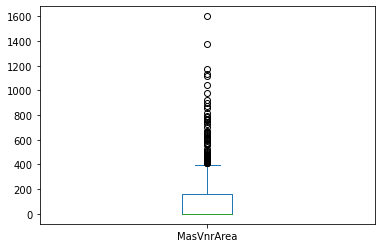

In [11]:
#univariate analysis
dp['MasVnrArea'].plot.box()

<AxesSubplot:>

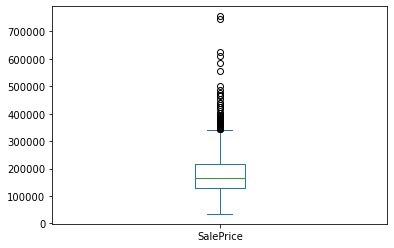

In [12]:
#univariate analysis
dp['SalePrice'].plot.box()

AS WE can observe from the above figures are are so much outliers in the mentioned LotFrontage,LotArea,MasVnrArea,BsmtFinSF1 
where there are no outliers in case of Id.

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

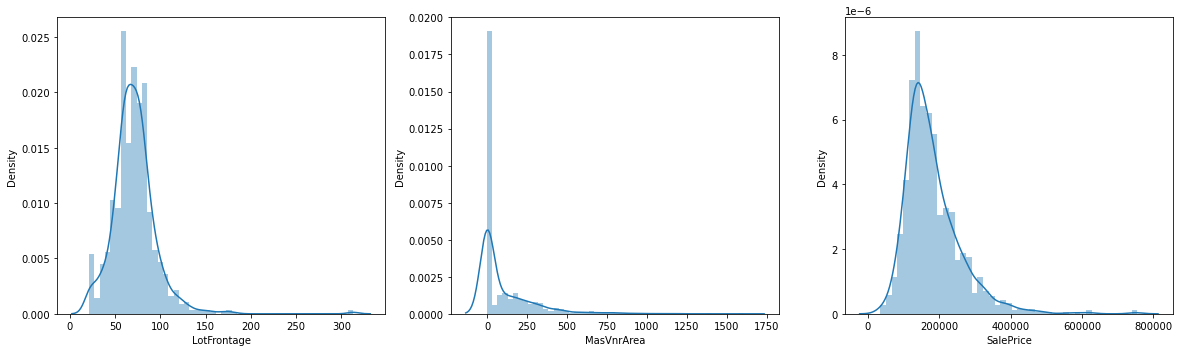

In [13]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.distplot(dp['LotFrontage'])

plt.subplot(2,3,2)
sns.distplot(dp['MasVnrArea'])

plt.subplot(2,3,3)
sns.distplot(dp['SalePrice'])

In [14]:
collist = dp.columns.values
ncol=12
nrows=10

Id                   AxesSubplot(0.125,0.71587;0.065678x0.16413)
MSSubClass        AxesSubplot(0.203814,0.71587;0.065678x0.16413)
LotFrontage       AxesSubplot(0.282627,0.71587;0.065678x0.16413)
LotArea           AxesSubplot(0.361441,0.71587;0.065678x0.16413)
OverallQual       AxesSubplot(0.440254,0.71587;0.065678x0.16413)
OverallCond       AxesSubplot(0.519068,0.71587;0.065678x0.16413)
YearBuilt         AxesSubplot(0.597881,0.71587;0.065678x0.16413)
YearRemodAdd      AxesSubplot(0.676695,0.71587;0.065678x0.16413)
MasVnrArea        AxesSubplot(0.755508,0.71587;0.065678x0.16413)
BsmtFinSF1        AxesSubplot(0.834322,0.71587;0.065678x0.16413)
BsmtFinSF2          AxesSubplot(0.125,0.518913;0.065678x0.16413)
BsmtUnfSF        AxesSubplot(0.203814,0.518913;0.065678x0.16413)
TotalBsmtSF      AxesSubplot(0.282627,0.518913;0.065678x0.16413)
1stFlrSF         AxesSubplot(0.361441,0.518913;0.065678x0.16413)
2ndFlrSF         AxesSubplot(0.440254,0.518913;0.065678x0.16413)
LowQualFinSF     AxesSubp

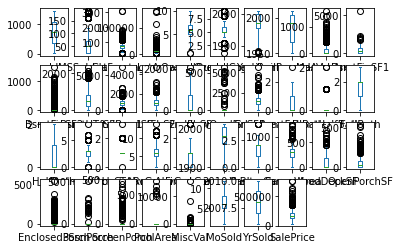

In [15]:
dp.plot(kind='box',subplots=True,layout=(4,10))

In [16]:
#check missing percentage
percent_missing = (dp.isnull().sum() / dp.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(15)

PoolQC          99.400685
MiscFeature     96.232877
Alley           93.407534
Fence           79.708904
FireplaceQu     47.174658
LotFrontage     18.321918
GarageYrBlt      5.479452
GarageFinish     5.479452
GarageType       5.479452
GarageQual       5.479452
GarageCond       5.479452
BsmtExposure     2.654110
BsmtFinType2     2.654110
BsmtQual         2.568493
BsmtCond         2.568493
dtype: float64

<AxesSubplot:>

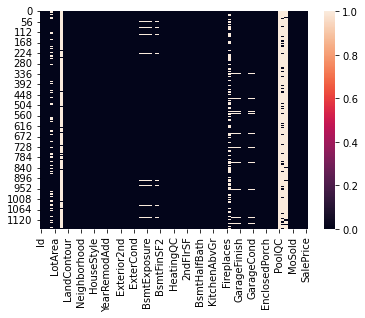

In [17]:
sns.heatmap(dp.isnull())

In [18]:
# Dropping Columns with high missing values ,above 40%

dp.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

In [19]:
dp[['LotFrontage','MasVnrArea','GarageYrBlt']].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,954.00000,1161.000000,1104.000000
mean,70.98847,102.310078,1978.193841
std,24.82875,182.595606,24.890704
min,21.00000,0.000000,1900.000000
25%,60.00000,0.000000,1961.000000
50%,70.00000,0.000000,1980.000000
75%,80.00000,160.000000,2002.000000
max,313.00000,1600.000000,2010.000000


In [20]:
#Treaming missing values by imputing for columns with missing values less than or equal to 40%

dp['LotFrontage']= dp.LotFrontage.fillna(dp.LotFrontage.median()) #Can see a presence of outlier so imputing the missing values through median
dp['MasVnrArea']= dp.MasVnrArea.fillna(dp.MasVnrArea.median())    # Can see presence of outlier
dp['GarageYrBlt']= dp.GarageYrBlt.fillna(dp.GarageYrBlt.mean())  # it looks stable with no outlier presence so we can use mean for imputation

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Density'>

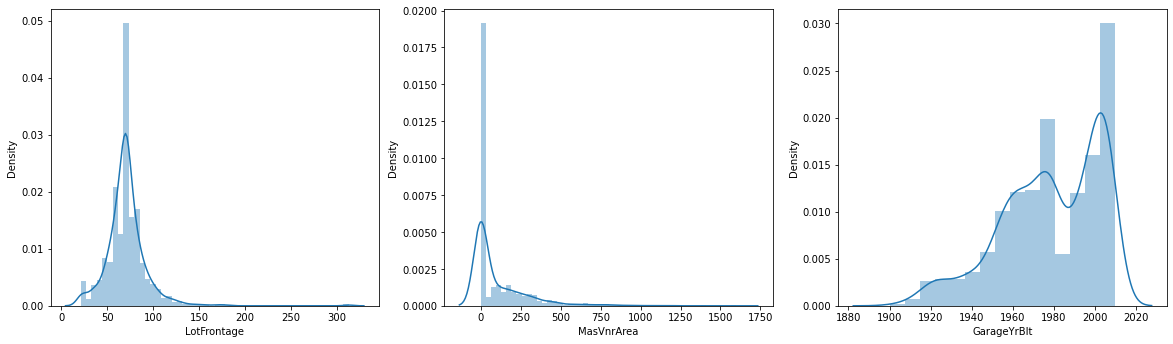

In [21]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.distplot(dp['LotFrontage'])
plt.subplot(2,3,2)
sns.distplot(dp['MasVnrArea'])
plt.subplot(2,3,3)
sns.distplot(dp['GarageYrBlt'])

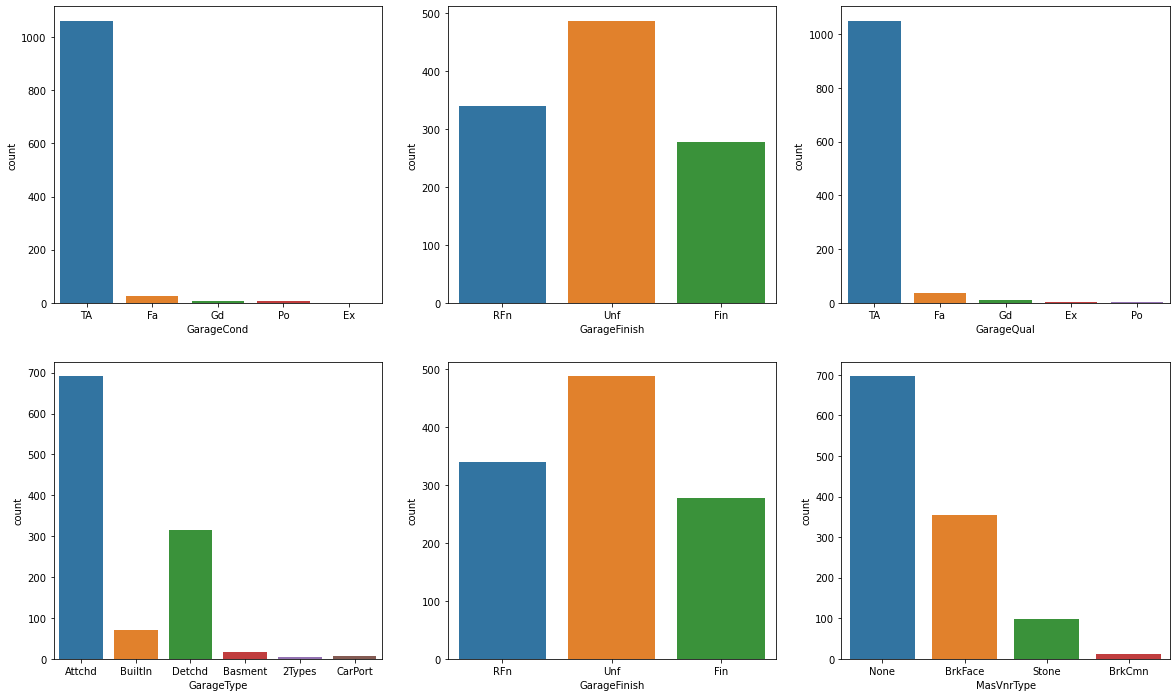

In [22]:
#Visualising the variables wih missing values

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'GarageCond', data = dp)

plt.subplot(2,3,2)
sns.countplot(x = 'GarageFinish',  data = dp)

plt.subplot(2,3,3)
sns.countplot(x = 'GarageQual', data = dp)
plt.subplot(2,3,4)
sns.countplot(x = 'GarageType', data = dp)
plt.subplot(2,3,5)
sns.countplot(x = 'GarageFinish',  data = dp)
plt.subplot(2,3,6)
sns.countplot(x = 'MasVnrType', data = dp)
plt.show()

In [23]:
# Cases when the house doesn't have the garrage so replacing null with No Garrage

dp['GarageType'] = dp['GarageType'].replace(np.nan, 'No Garage')
dp['GarageFinish'] = dp['GarageFinish'].replace(np.nan, 'No Garage')
dp['GarageCond'] = dp['GarageCond'].replace(np.nan, 'No Garage')
dp['GarageQual'] = dp['GarageQual'].replace(np.nan, 'No Garage')
dp['MasVnrType'] = dp['MasVnrType'].replace(np.nan, 'None') # replacing nan with the top option of this field
dp['Electrical'] = dp['Electrical'].replace(np.nan, 'SBrkr') # replacing nan with the top option of this field

In [24]:
#changing num to categorical so as to form these as dummy variables 
dp['MSSubClass']=dp['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

dp['OverallQual']=dp['OverallQual'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})
dp['OverallCond']=dp['OverallCond'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

In [25]:
dp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,1-STORY PUD (Planned Unit Development) - 1946 ...,RL,70.0,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,Above Average,Average,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,0,2,2007,WD,Normal,128000
1,889,1-STORY 1946 & NEWER ALL STYLES,RL,95.0,15865,Pave,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,Very Good,Above Average,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,0,10,2007,WD,Normal,268000
2,793,2-STORY 1946 & NEWER,RL,92.0,9920,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Good,Average,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,0,6,2007,WD,Normal,269790
3,110,1-STORY 1946 & NEWER ALL STYLES,RL,105.0,11751,Pave,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Above Average,Above Average,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,0,1,2010,COD,Normal,190000
4,422,1-STORY 1946 & NEWER ALL STYLES,RL,70.0,16635,Pave,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Above Average,Good,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,0,6,2009,WD,Normal,215000


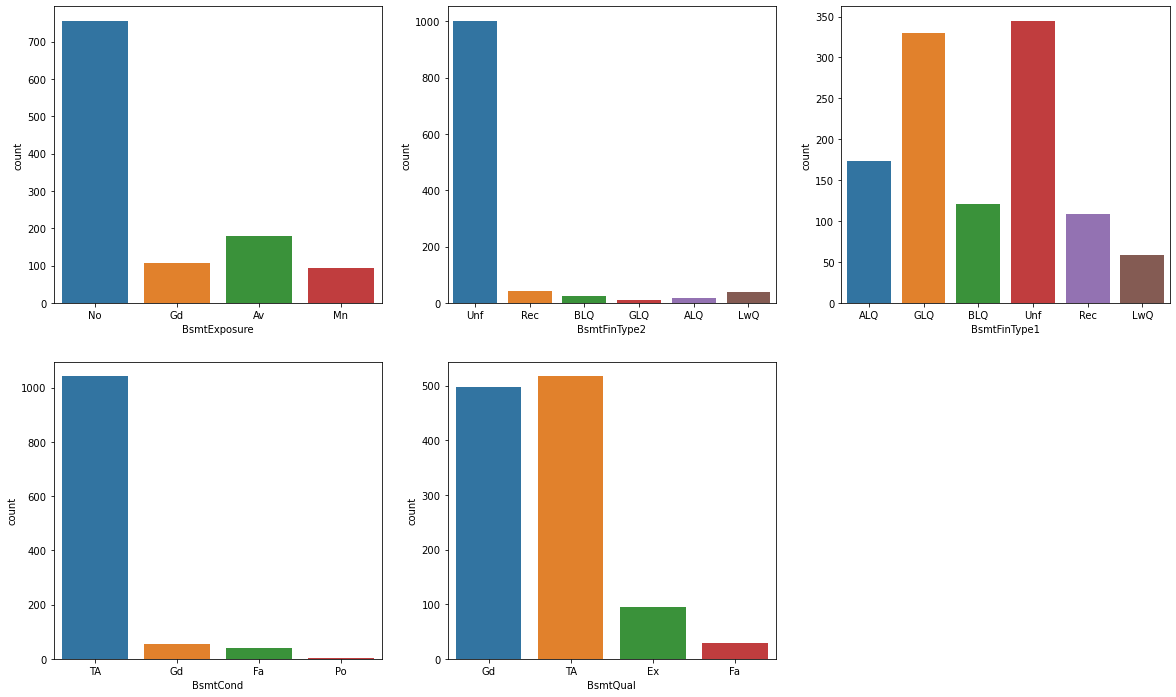

In [26]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'BsmtExposure', data = dp)

plt.subplot(2,3,2)
sns.countplot(x = 'BsmtFinType2',  data = dp)

plt.subplot(2,3,3)
sns.countplot(x = 'BsmtFinType1', data = dp)
plt.subplot(2,3,4)
sns.countplot(x = 'BsmtCond', data = dp)
plt.subplot(2,3,5)
sns.countplot(x = 'BsmtQual',  data = dp)

plt.show()

In [27]:
# Cases when the house doesn't have the basement so replacing null with No Basement

dp['BsmtExposure'] = dp['BsmtExposure'].replace(np.nan, 'No Basement')
dp['BsmtFinType2'] = dp['BsmtFinType2'].replace(np.nan, 'No Basement')
dp['BsmtFinType1'] = dp['BsmtFinType1'].replace(np.nan, 'No Basement')
dp['BsmtCond'] = dp['BsmtCond'].replace(np.nan, 'No Basement')
dp['BsmtQual'] = dp['BsmtQual'].replace(np.nan, 'No Basement')

In [28]:
#check missing percentage
percent_missing = (dp.isnull().sum() / dp.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(10)

Id              0.0
FullBath        0.0
Fireplaces      0.0
Functional      0.0
TotRmsAbvGrd    0.0
KitchenQual     0.0
KitchenAbvGr    0.0
BedroomAbvGr    0.0
HalfBath        0.0
BsmtHalfBath    0.0
dtype: float64

# As We Can See From The Above Results All The Missing Values has been treated

In [29]:
#Let's check the dependent variable i.e SalePrice

#descriptive statistics summary
dp['SalePrice'].describe()

count      1168.000000
mean     181477.005993
std       79105.586863
min       34900.000000
25%      130375.000000
50%      163995.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

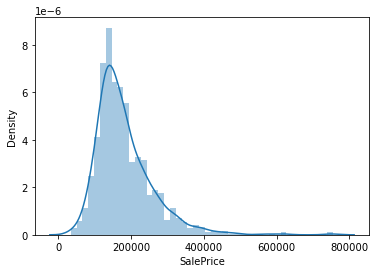

In [30]:
sns.distplot(dp['SalePrice']) #it's skewed 

In [31]:
#skewness and kurtosis
print("Skewness: %f" % dp['SalePrice'].skew())

Skewness: 1.953878


In [32]:
dp['SalePrice']=np.log(dp.SalePrice) #tranforming to form normal disribution

In [33]:
dp['SalePrice'].describe()

count    1168.000000
mean       12.028292
std         0.397423
min        10.460242
25%        11.778169
50%        12.007591
75%        12.278393
max        13.534473
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

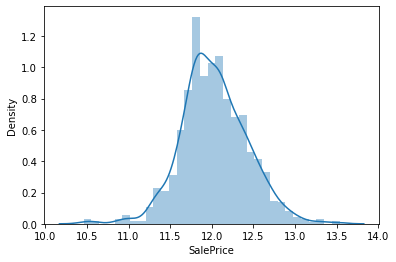

In [34]:
sns.distplot(dp['SalePrice']) # Normally distributed now

In [35]:
#skewness 
print("Skewness: %f" % dp['SalePrice'].skew())

Skewness: 0.073597


In [36]:
dpcor=dp.corr()
dpcor

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,-0.006165,-0.029212,-0.016942,-0.018590,-0.061397,0.003868,0.005269,-0.019494,-0.013812,0.009647,-0.029671,-0.070180,-0.024325,0.023027,-0.043572,-0.015187,-0.028512,0.009376,0.001216,-0.001613,-0.024175,-0.000456,0.007549,0.010048,-0.027498,-0.013642,0.004885,-0.021773,0.005169,0.065832,0.001304,0.023479,-0.008853,-0.025061
LotFrontage,-0.006165,1.000000,0.296790,0.112000,0.089513,0.188273,0.227732,0.001253,0.115628,0.356180,0.402864,0.089816,0.008087,0.374000,0.092807,0.001375,0.171842,0.047149,0.236946,-0.002082,0.318941,0.228494,0.056218,0.260224,0.322750,0.087267,0.151044,0.021103,0.050499,0.030440,0.195973,-0.002830,0.022579,-0.004162,0.319901
LotArea,-0.029212,0.296790,1.000000,0.005506,0.027228,0.120192,0.221851,0.056656,0.006600,0.259733,0.312843,0.059803,-0.001915,0.281360,0.142387,0.059282,0.123197,0.007271,0.117351,-0.013075,0.184546,0.285983,-0.034765,0.158313,0.195162,0.216720,0.093080,-0.007446,0.025794,0.025256,0.097107,0.051679,0.015141,-0.035399,0.250576
YearBuilt,-0.016942,0.112000,0.005506,1.000000,0.592829,0.318562,0.227933,-0.027682,0.155559,0.386265,0.279450,0.011834,-0.189044,0.198644,0.164983,-0.028161,0.471264,0.243227,-0.080639,-0.167869,0.095476,0.134313,0.783710,0.525346,0.473216,0.204830,0.191069,-0.373544,0.037079,-0.058760,0.006408,-0.030008,0.031754,-0.013976,0.575768
YearRemodAdd,-0.018590,0.089513,0.027228,0.592829,1.000000,0.178583,0.114430,-0.044694,0.174732,0.280720,0.233384,0.155102,-0.072526,0.295048,0.104643,-0.011375,0.444446,0.194943,-0.035847,-0.139943,0.206923,0.118378,0.615011,0.428325,0.387744,0.197410,0.238755,-0.193574,0.064763,-0.046220,0.006874,-0.001199,0.024663,0.033265,0.570256
MasVnrArea,-0.061397,0.188273,0.120192,0.318562,0.178583,1.000000,0.263377,-0.064685,0.108974,0.362330,0.334512,0.172136,-0.070026,0.384386,0.084498,0.014974,0.264357,0.197831,0.091339,-0.039438,0.277737,0.241040,0.247902,0.340100,0.363537,0.152083,0.127876,-0.102142,0.019123,0.047375,0.013836,-0.027263,0.012707,-0.013220,0.414470
BsmtFinSF1,0.003868,0.227732,0.221851,0.227933,0.114430,0.263377,1.000000,-0.052145,-0.499861,0.518940,0.445876,-0.127656,-0.070932,0.217160,0.645126,0.063895,0.054511,0.015767,-0.114888,-0.065450,0.043499,0.257482,0.132753,0.197529,0.286290,0.192939,0.108802,-0.082351,0.025485,0.033490,0.154769,0.008314,0.007482,0.005614,0.348917
BsmtFinSF2,0.005269,0.001253,0.056656,-0.027682,-0.044694,-0.064685,-0.052145,1.000000,-0.213580,0.098167,0.093442,-0.092049,-0.000577,-0.007484,0.163518,0.093692,-0.060773,-0.023734,-0.005788,-0.034411,-0.033702,0.047945,-0.071293,-0.020806,-0.002051,0.094690,-0.014103,0.032081,-0.031263,0.076561,0.045990,0.007915,-0.014605,0.038438,0.014509
BsmtUnfSF,-0.019494,0.115628,0.006600,0.155559,0.174732,0.108974,-0.499861,-0.213580,1.000000,0.414186,0.307437,0.002736,0.030088,0.232920,-0.431740,-0.090372,0.272193,-0.044025,0.156056,0.015532,0.237043,0.040509,0.187511,0.221097,0.191177,-0.001966,0.138456,-0.013251,0.025779,0.001076,-0.039029,-0.017266,0.030011,-0.049734,0.218868
TotalBsmtSF,-0.013812,0.356180,0.259733,0.386265,0.280720,0.362330,0.518940,0.098167,0.414186,1.000000,0.813357,-0.164795,-0.043845,0.461067,0.296654,0.009657,0.311120,-0.037014,0.036237,-0.065410,0.273895,0.328241,0.303038,0.423592,0.492980,0.234848,0.249284,-0.087751,0.041295,0.064434,0.139252,-0.005920,0.032920,-0.030448,0.592753


<AxesSubplot:>

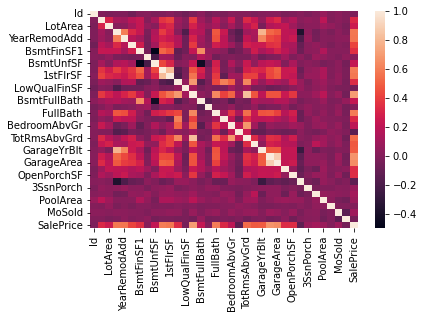

In [38]:
sns.heatmap(dpcor)

In [39]:
#sns.heatmap?

<AxesSubplot:>

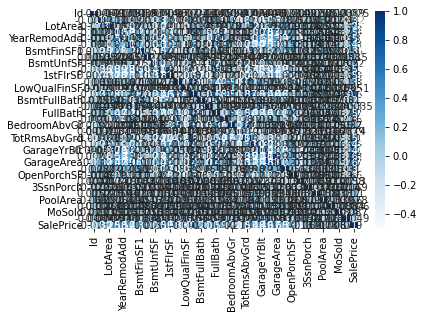

In [41]:
plt.figure(figsize=(6,4))
sns.heatmap(dpcor,cmap='Blues',annot=True)

cmap : matplotlib colormap name
colormap gives
#https://matplotlib.org/stable/gallery/color/colormap_reference.html


<AxesSubplot:>

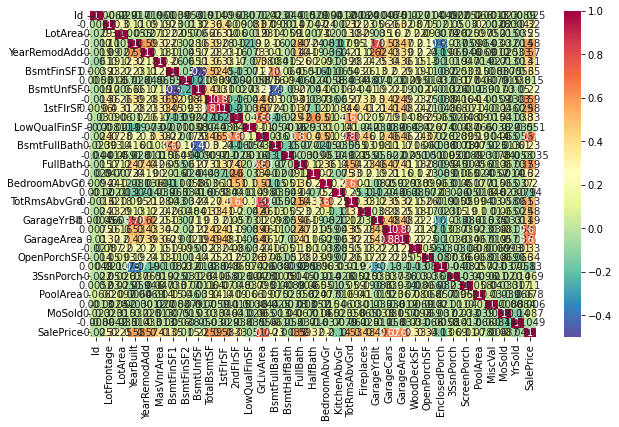

In [42]:
plt.figure(figsize=(10,6))
sns.heatmap(dpcor,cmap='Spectral_r',annot=True)

# We can say that now Dependent variable SalePrice is normally distributed.

# EDA
Now We will check all the Categorical columns and their effect on price

In [43]:
Cat = dp.select_dtypes(include=['object'])
Cat.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [44]:
# as we have many columns so let's make groups randomly and visualize them
# we would be making two graphs to understand firstly the countplot and secondaly effect of that variable on dependent variable i.e. SalePrice

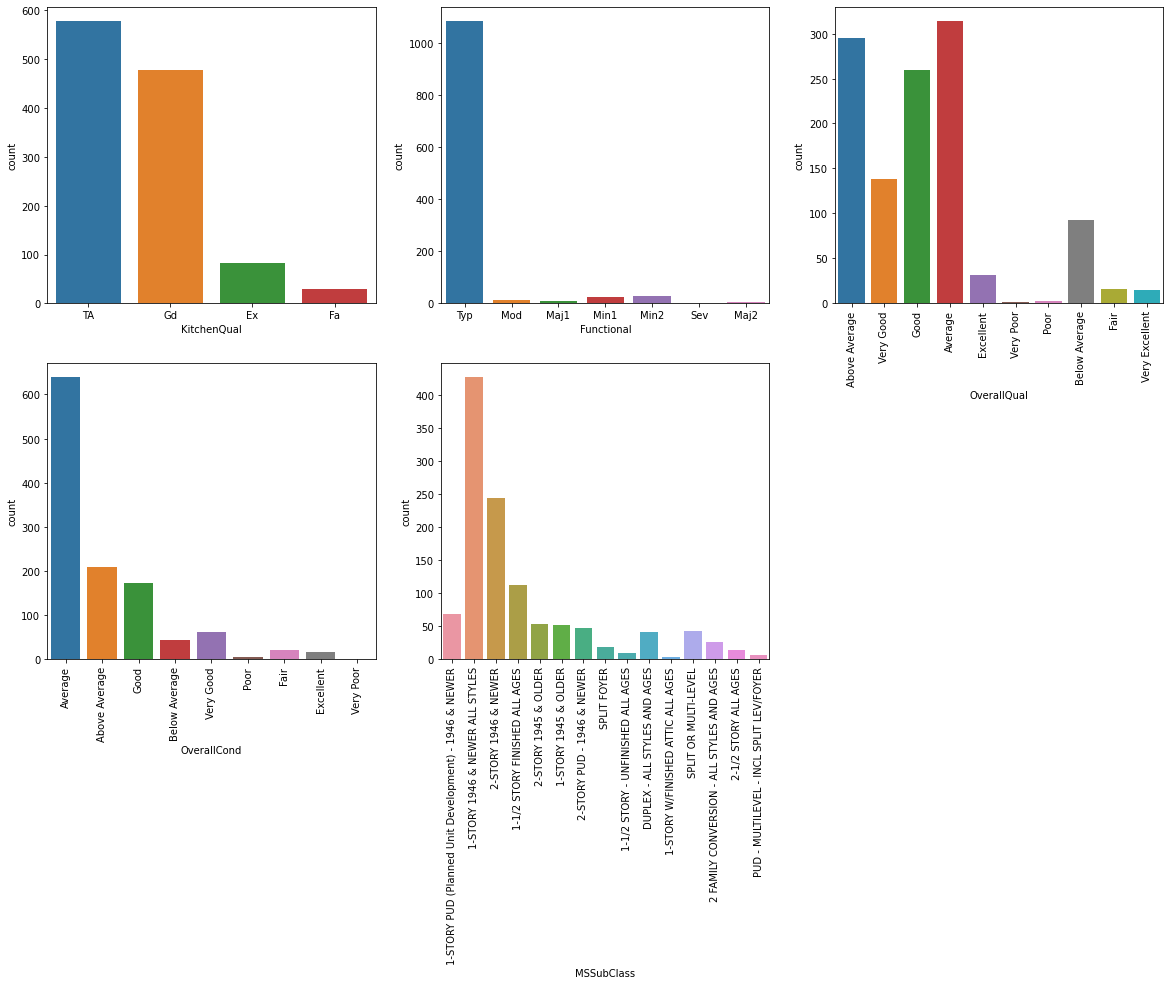

In [45]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'KitchenQual',  data = dp)
plt.subplot(2,3,2)
sns.countplot(x = 'Functional', data = dp)
plt.subplot(2,3,3)
sns.countplot(x = 'OverallQual', data = dp)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'OverallCond', data = dp)
plt.xticks(rotation=90)

plt.subplot(2,3,5)
sns.countplot(x = 'MSSubClass',  data = dp)
plt.xticks(rotation=90)


plt.show()

In [46]:
dp['MSSubClass'].value_counts() # similarly checking other columns for skewness

1-STORY 1946 & NEWER ALL STYLES                          428
2-STORY 1946 & NEWER                                     244
1-1/2 STORY FINISHED ALL AGES                            113
1-STORY PUD (Planned Unit Development) - 1946 & NEWER     69
2-STORY 1945 & OLDER                                      53
1-STORY 1945 & OLDER                                      52
2-STORY PUD - 1946 & NEWER                                47
SPLIT OR MULTI-LEVEL                                      43
DUPLEX - ALL STYLES AND AGES                              41
2 FAMILY CONVERSION - ALL STYLES AND AGES                 26
SPLIT FOYER                                               19
2-1/2 STORY ALL AGES                                      14
1-1/2 STORY - UNFINISHED ALL AGES                         10
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                    6
1-STORY W/FINISHED ATTIC ALL AGES                          3
Name: MSSubClass, dtype: int64

In [47]:
# Dropping highly skewed column 
dp.drop(['Functional'],axis=1,inplace=True)

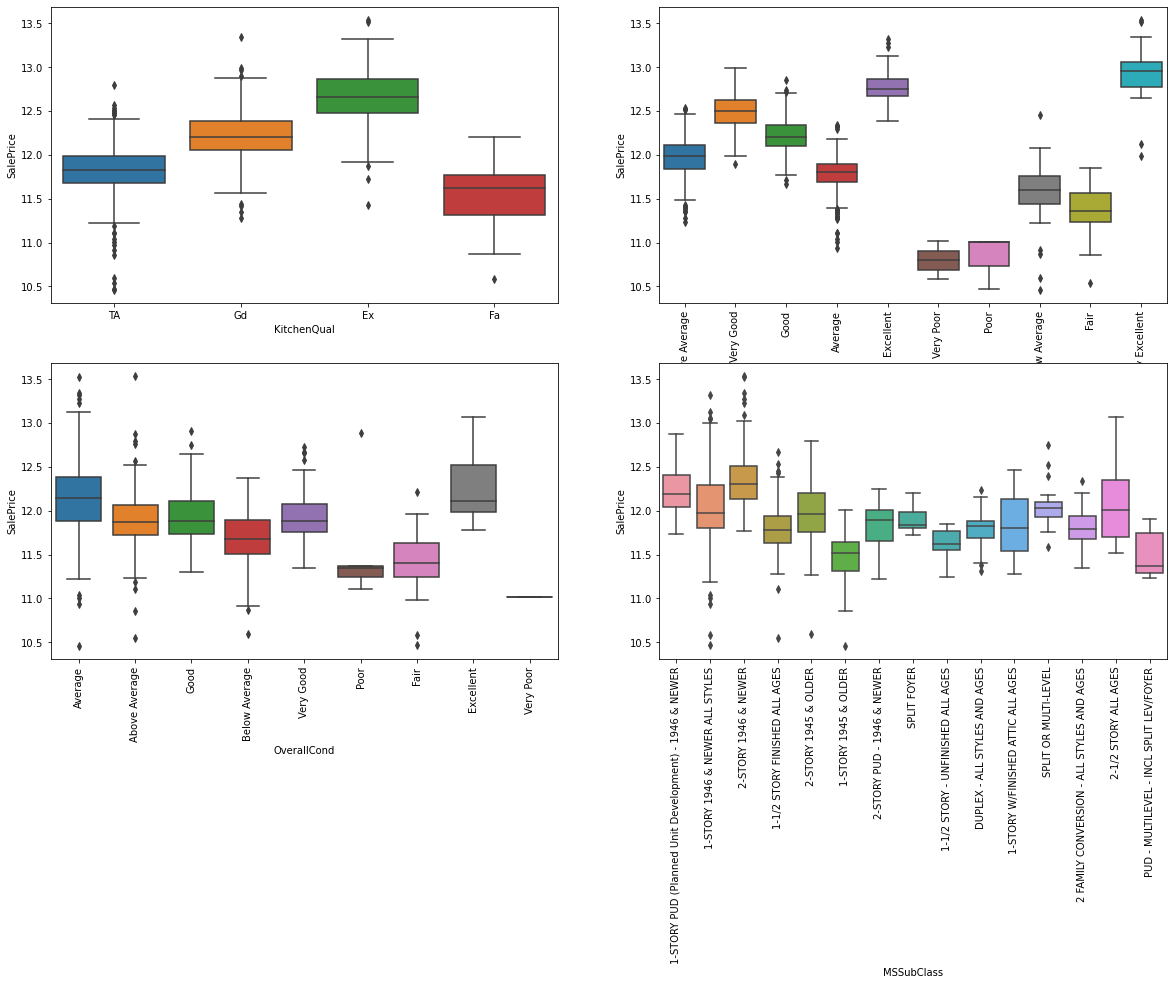

In [48]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x ='KitchenQual', y ='SalePrice', data = dp)
plt.subplot(2,2,2)
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = dp)
plt.xticks(rotation=90)

plt.subplot(2,2,3)
sns.boxplot(x = 'OverallCond', y = 'SalePrice', data = dp)
plt.xticks(rotation=90)

plt.subplot(2,2,4)
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = dp)
plt.xticks(rotation=90)

plt.show()

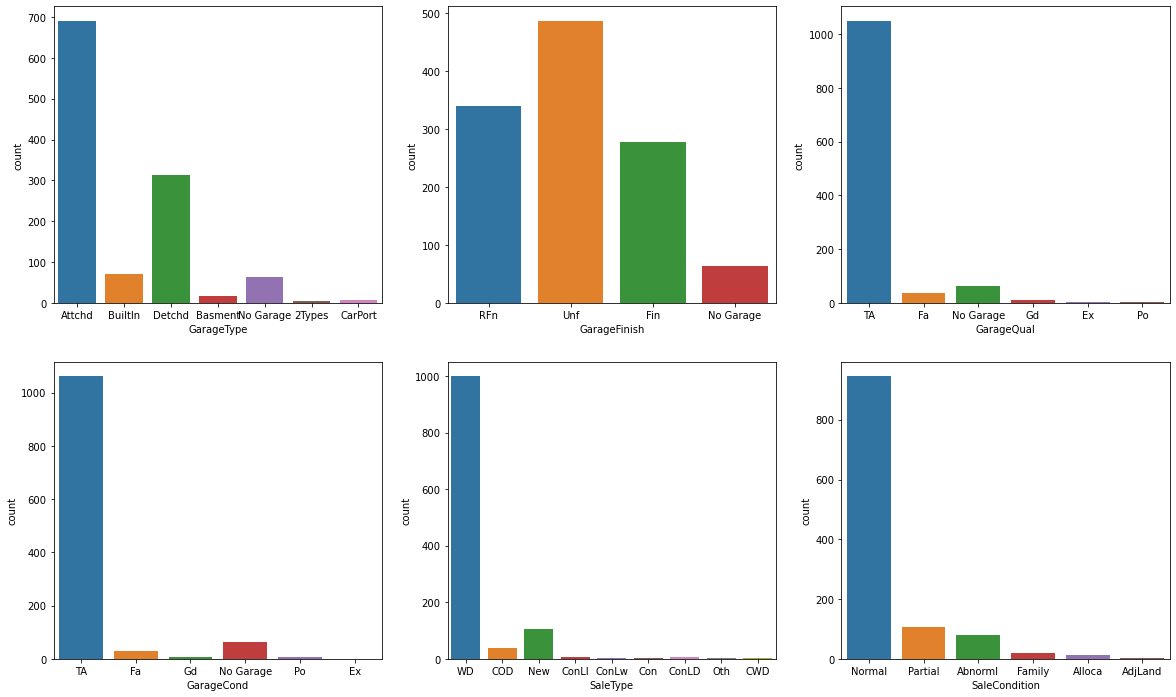

In [49]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'GarageType',  data = dp)
plt.subplot(2,3,2)
sns.countplot(x = 'GarageFinish', data = dp)
plt.subplot(2,3,3)
sns.countplot(x = 'GarageQual', data = dp)
plt.subplot(2,3,4)
sns.countplot(x = 'GarageCond', data = dp)
plt.subplot(2,3,5)
sns.countplot(x = 'SaleType',  data = dp)
plt.subplot(2,3,6)
sns.countplot(x = 'SaleCondition', data = dp)
plt.show()

In [50]:
dp['SaleCondition'].value_counts() #similarly checking other columns for skewness

Normal     945
Partial    108
Abnorml     81
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64

In [51]:
dp['GarageType'] = dp['GarageType'].replace(['Basment','CarPort','2Types'],'Others')
dp['SaleCondition'] = dp['SaleCondition'].replace(['Family','Alloca','AdjLand'],'Others')



# Dropping highly skewed column 
dp.drop(['GarageQual','GarageCond','SaleType'],axis=1,inplace=True)

<AxesSubplot:xlabel='GarageFinish', ylabel='SalePrice'>

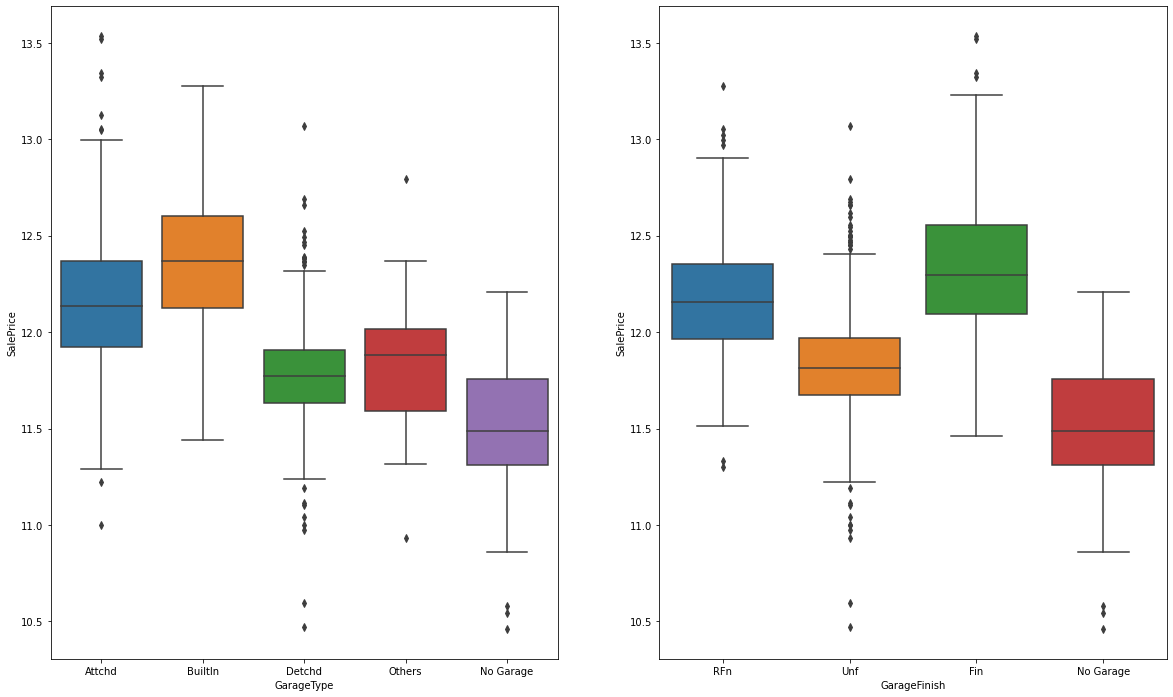

In [52]:
#Let's see effect of Garage type and GarageFinish on SalePrice

plt.figure(figsize=(20, 12))
plt.subplot(1,2,1)
sns.boxplot(x = 'GarageType', y ='SalePrice', data = dp)
plt.subplot(1,2,2)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = dp)

Price of Builtin Garagetype and Finished garage is the highest
............................................................................................

g7= 'Electrical', 'KitchenQual', 'Functional'

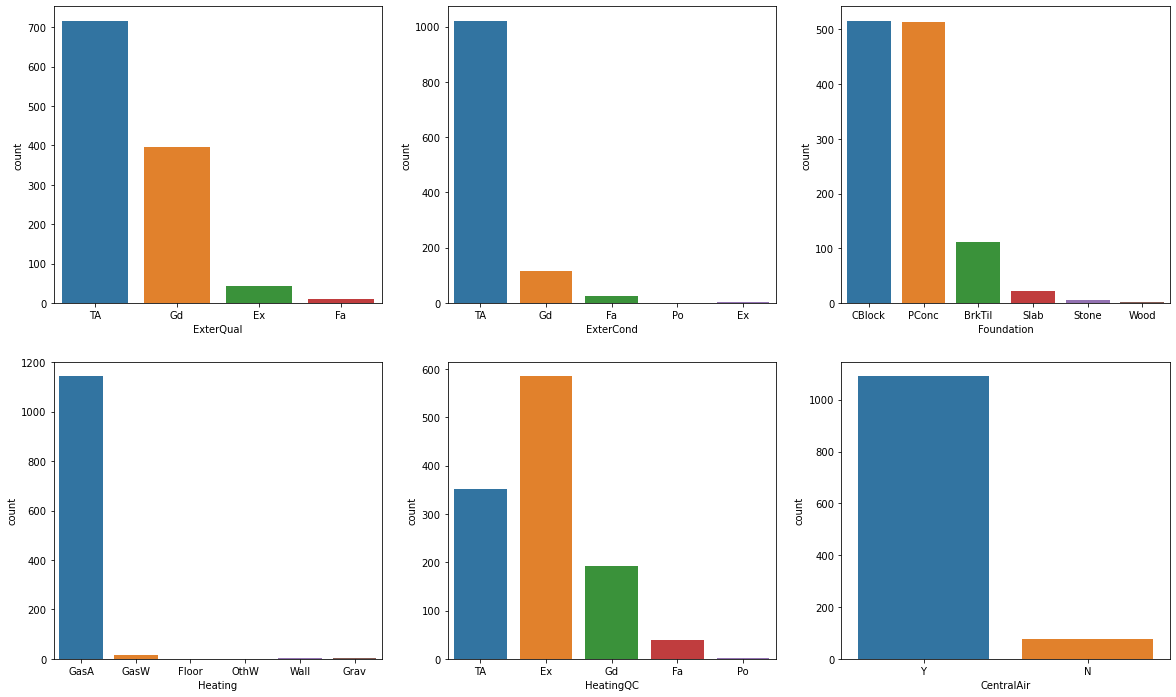

In [53]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'ExterQual',  data = dp)
plt.subplot(2,3,2)
sns.countplot(x = 'ExterCond', data = dp)
plt.subplot(2,3,3)
sns.countplot(x = 'Foundation', data = dp)
plt.subplot(2,3,4)
sns.countplot(x = 'Heating', data = dp)
plt.subplot(2,3,5)
sns.countplot(x = 'HeatingQC',  data = dp)
plt.subplot(2,3,6)
sns.countplot(x = 'CentralAir', data = dp)
plt.show()

In [54]:
dp['HeatingQC'].value_counts() # similarly checked for all variables to check the skewness

Ex    585
TA    352
Gd    192
Fa     38
Po      1
Name: HeatingQC, dtype: int64

In [55]:
dp['Foundation'] = dp['Foundation'].replace(['Slab','Stone','Wood'],'Others')



# Dropping highly skewed column 
dp.drop(['CentralAir','Heating','ExterCond'],axis=1,inplace=True)

<AxesSubplot:xlabel='HeatingQC', ylabel='SalePrice'>

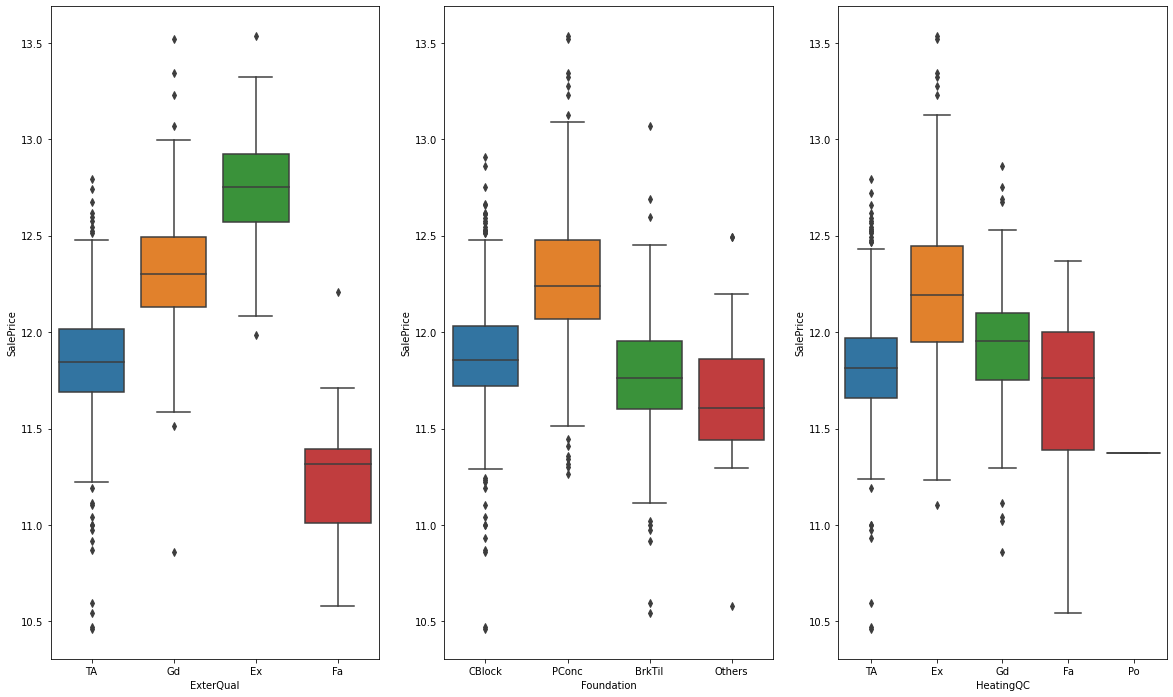

In [56]:
#Let's see effect of Garage type and GarageFinish on SalePrice

plt.figure(figsize=(20, 12))
plt.subplot(1,3,1)
sns.boxplot(x = 'ExterQual', y ='SalePrice', data = dp)
plt.subplot(1,3,2)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = dp)
plt.subplot(1,3,3)
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = dp)

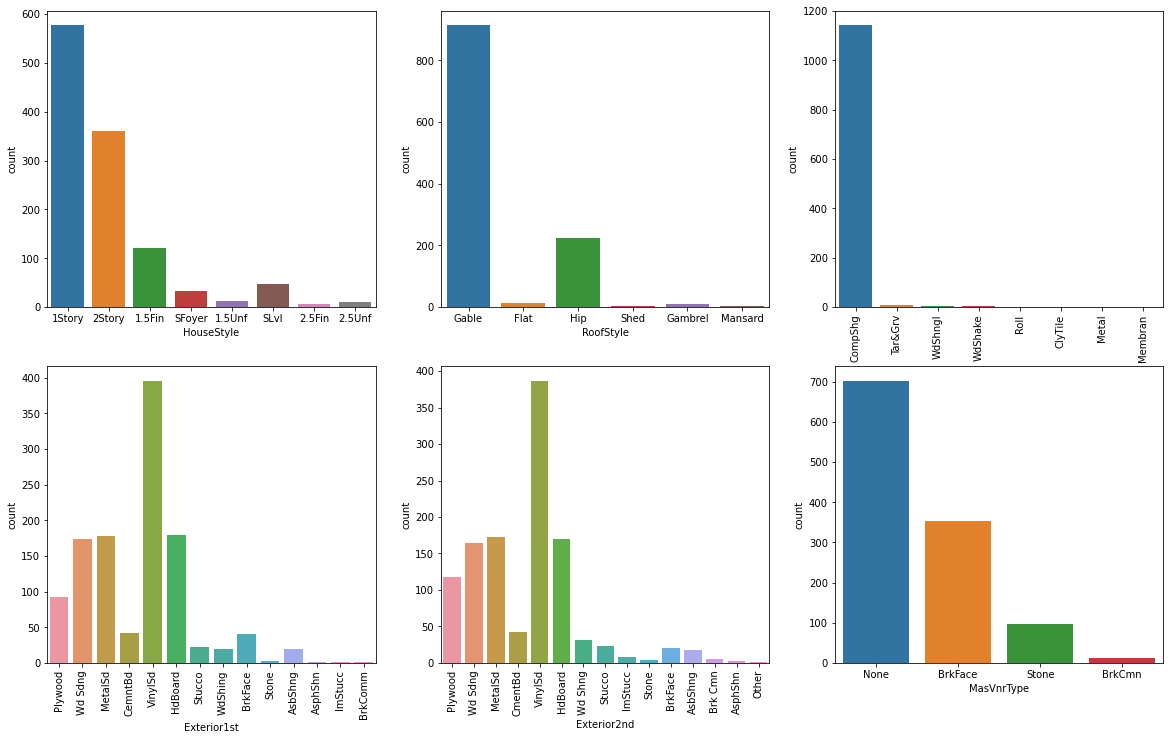

In [57]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'HouseStyle',  data = dp)
plt.subplot(2,3,2)
sns.countplot(x = 'RoofStyle', data = dp)
plt.subplot(2,3,3)
sns.countplot(x = 'RoofMatl', data = dp)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'Exterior1st', data = dp)
plt.xticks(rotation=90)
plt.subplot(2,3,5)
sns.countplot(x = 'Exterior2nd',  data = dp)
plt.xticks(rotation=90)
plt.subplot(2,3,6)
sns.countplot(x = 'MasVnrType', data = dp)
plt.show()

In [58]:
dp['Exterior2nd'].value_counts() #similarly checking the skewness for other columns

VinylSd    387
MetalSd    173
HdBoard    170
Wd Sdng    165
Plywood    118
CmentBd     42
Wd Shng     31
Stucco      23
BrkFace     20
AsbShng     18
ImStucc      8
Brk Cmn      5
Stone        4
AsphShn      3
Other        1
Name: Exterior2nd, dtype: int64

In [59]:
dp['HouseStyle'] = dp['HouseStyle'].replace(['SFoyer','1.5Unf','2.5Unf','2.5Fin'],'Others')
dp['RoofStyle'] = dp['RoofStyle'].replace(['Shed','Mansard','Gambrel','Flat'],'Others')
dp['Exterior1st'] = dp['Exterior1st'].replace(['AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','WdShing'],'Others')
dp['Exterior2nd'] = dp['Exterior2nd'].replace(['Other','AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','BrkFace'],'Others')




# Dropping highly skewed column 
dp.drop(['RoofMatl'],axis=1,inplace=True)

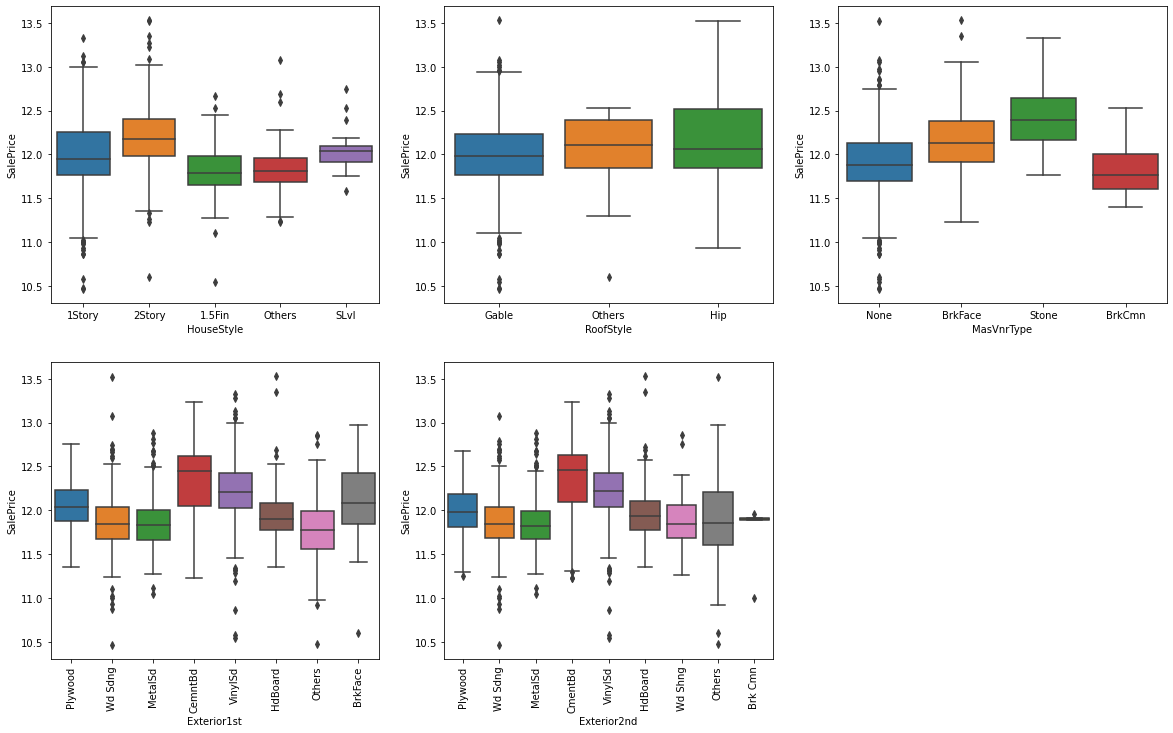

In [60]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'HouseStyle', y ='SalePrice', data = dp)
plt.subplot(2,3,2)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = dp)
plt.subplot(2,3,3)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = dp)
plt.subplot(2,3,4)
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = dp)
plt.xticks(rotation=90)
plt.subplot(2,3,5)
sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = dp)
plt.xticks(rotation=90)
plt.show()


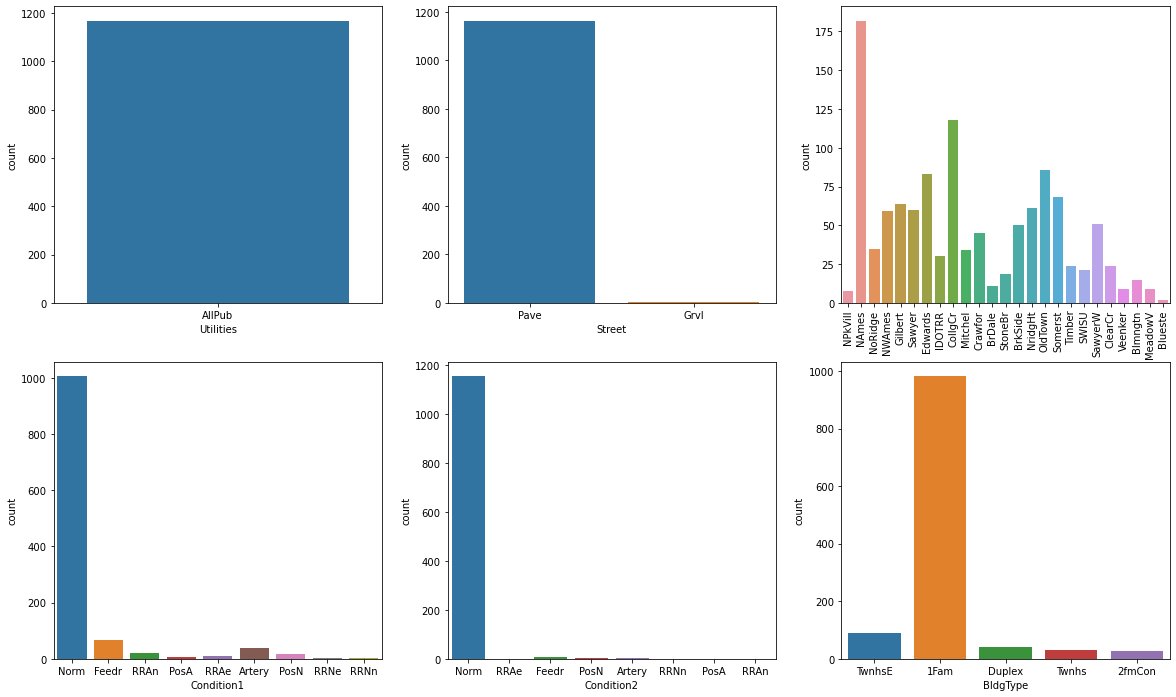

In [61]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'Utilities',  data = dp)
plt.subplot(2,3,2)
sns.countplot(x = 'Street', data = dp)
plt.subplot(2,3,3)
sns.countplot(x = 'Neighborhood', data = dp)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'Condition1', data = dp)
plt.subplot(2,3,5)
sns.countplot(x = 'Condition2',  data = dp)
plt.subplot(2,3,6)
sns.countplot(x = 'BldgType', data = dp)
plt.show()

In [62]:
dp['BldgType'].value_counts()#similarly checking skewness for other columns

1Fam      981
TwnhsE     90
Duplex     41
Twnhs      29
2fmCon     27
Name: BldgType, dtype: int64

In [63]:
# Dropping highly skewed column 
dp.drop(['Utilities','Street','Condition1','Condition2'],axis=1,inplace=True)

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

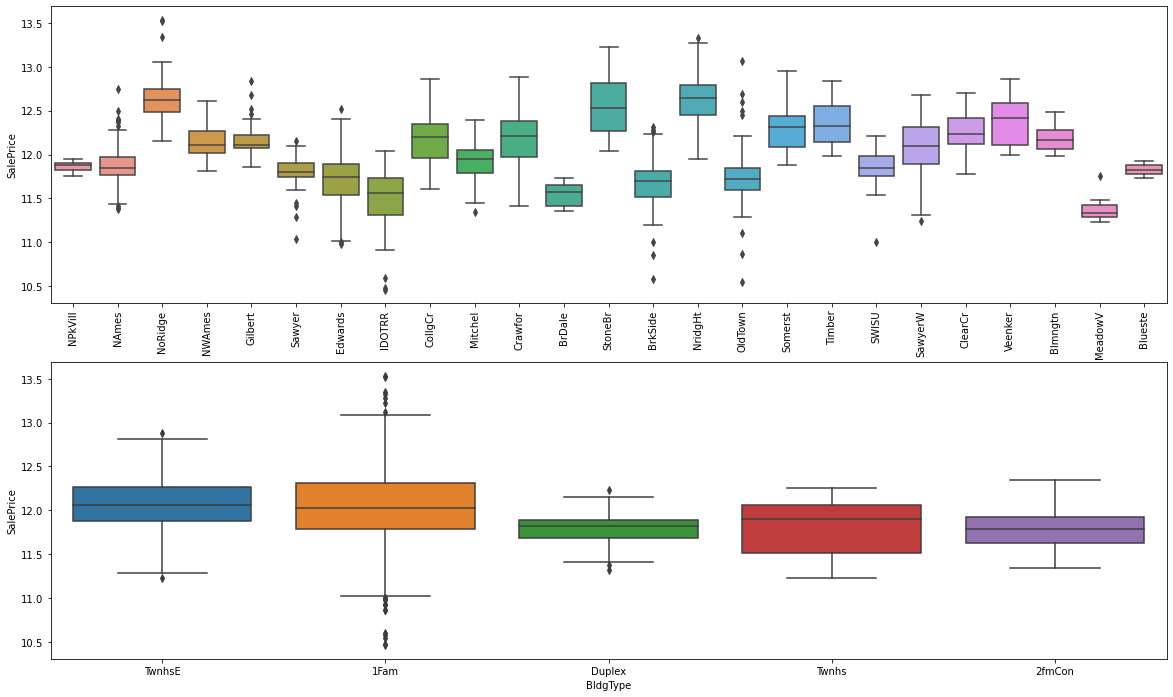

In [64]:
plt.figure(figsize=(20, 12))
plt.subplot(2,1,1)
sns.boxplot(x = 'Neighborhood', y ='SalePrice', data = dp)
plt.xticks(rotation=90)
plt.subplot(2,1,2)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = dp)

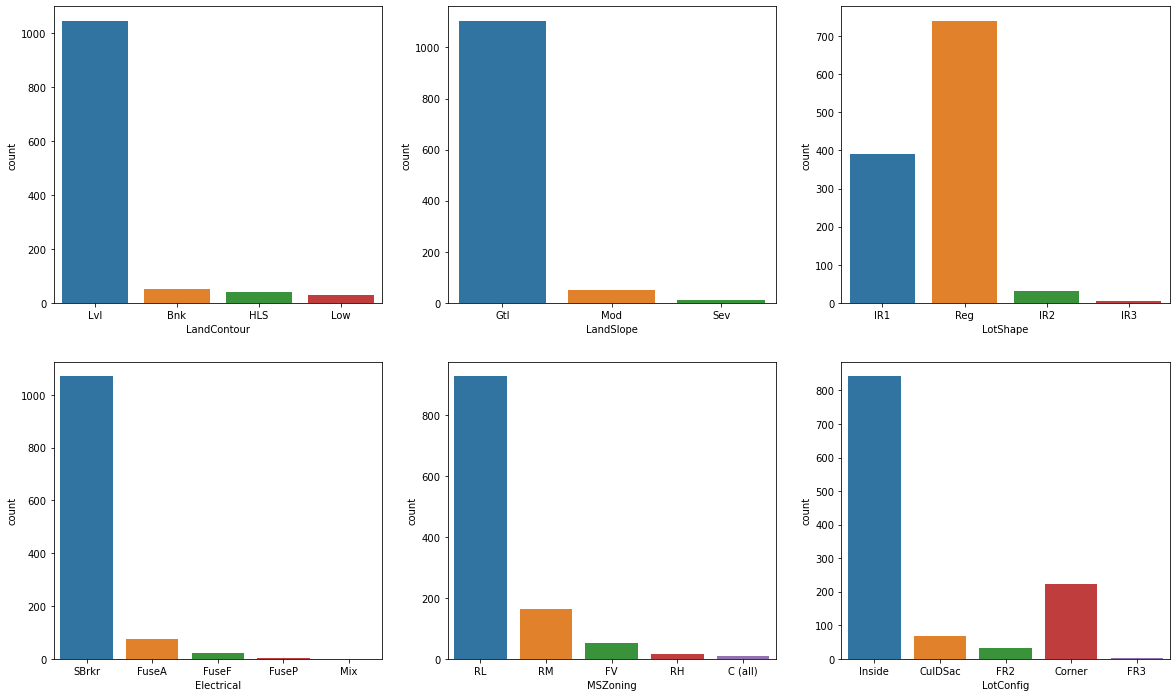

In [65]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'LandContour', data = dp)
plt.subplot(2,3,2)
sns.countplot(x = 'LandSlope', data = dp)
plt.subplot(2,3,3)
sns.countplot(x = 'LotShape', data = dp)
plt.subplot(2,3,4)
sns.countplot(x = 'Electrical', data = dp)
plt.subplot(2,3,5)
sns.countplot(x = 'MSZoning',  data = dp)
plt.subplot(2,3,6)
sns.countplot(x = 'LotConfig', data = dp)
plt.show()

In [66]:
dp['LotConfig'].value_counts()

Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64

In [67]:
dp.drop(['LandSlope','LandContour','Electrical'],axis=1,inplace=True)

dp['MSZoning'] = dp['MSZoning'].replace(['RH','C (all)'],'Others')

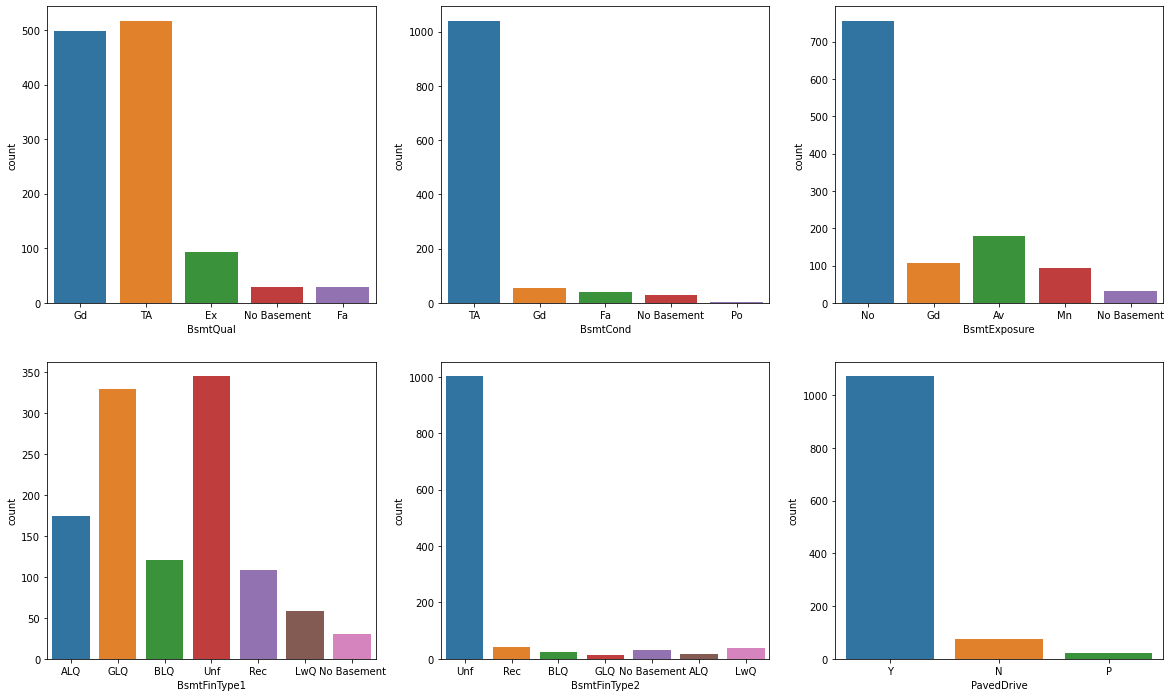

In [68]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'BsmtQual',  data = dp)
plt.subplot(2,3,2)
sns.countplot(x = 'BsmtCond', data = dp)
plt.subplot(2,3,3)
sns.countplot(x = 'BsmtExposure', data = dp)
plt.subplot(2,3,4)
sns.countplot(x = 'BsmtFinType1', data = dp)
plt.subplot(2,3,5)
sns.countplot(x = 'BsmtFinType2',  data = dp)
plt.subplot(2,3,6)
sns.countplot(x = 'PavedDrive', data = dp)
plt.show()

In [69]:
dp['BsmtCond'].value_counts() # similarly checking skewness for other columns

TA             1041
Gd               56
Fa               39
No Basement      30
Po                2
Name: BsmtCond, dtype: int64

In [70]:
dp.drop(['BsmtFinType2','PavedDrive','BsmtCond'],axis=1,inplace=True)

In [71]:
dp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,127,1-STORY PUD (Planned Unit Development) - 1946 ...,RL,70.0,4928,IR1,Inside,NPkVill,TwnhsE,1Story,Above Average,Average,1976,1976,Gable,Plywood,Plywood,None,0.0,TA,CBlock,Gd,No,ALQ,120,0,958,1078,TA,958,0,0,958,0,0,2,0,2,1,TA,5,1,Attchd,1977.0,RFn,2,440,0,205,0,0,0,0,0,2,2007,Normal,11.759786
1,889,1-STORY 1946 & NEWER ALL STYLES,RL,95.0,15865,IR1,Inside,NAmes,1Fam,1Story,Very Good,Above Average,1970,1970,Others,Wd Sdng,Wd Sdng,None,0.0,Gd,PConc,TA,Gd,ALQ,351,823,1043,2217,Ex,2217,0,0,2217,1,0,2,0,4,1,Gd,8,1,Attchd,1970.0,Unf,2,621,81,207,0,0,224,0,0,10,2007,Normal,12.498742
2,793,2-STORY 1946 & NEWER,RL,92.0,9920,IR1,CulDSac,NoRidge,1Fam,2Story,Good,Average,1996,1997,Gable,MetalSd,MetalSd,None,0.0,Gd,PConc,Gd,Av,GLQ,862,0,255,1117,Ex,1127,886,0,2013,1,0,2,1,3,1,TA,8,1,Attchd,1997.0,Unf,2,455,180,130,0,0,0,0,0,6,2007,Normal,12.505399
3,110,1-STORY 1946 & NEWER ALL STYLES,RL,105.0,11751,IR1,Inside,NWAmes,1Fam,1Story,Above Average,Above Average,1977,1977,Hip,Plywood,Plywood,BrkFace,480.0,TA,CBlock,Gd,No,BLQ,705,0,1139,1844,Ex,1844,0,0,1844,0,0,2,0,3,1,TA,7,1,Attchd,1977.0,RFn,2,546,0,122,0,0,0,0,0,1,2010,Normal,12.154779
4,422,1-STORY 1946 & NEWER ALL STYLES,RL,70.0,16635,IR1,FR2,NWAmes,1Fam,1Story,Above Average,Good,1977,2000,Gable,CemntBd,CmentBd,Stone,126.0,Gd,CBlock,Gd,No,ALQ,1246,0,356,1602,Gd,1602,0,0,1602,0,1,2,0,3,1,Gd,8,1,Attchd,1977.0,Fin,2,529,240,0,0,0,0,0,0,6,2009,Normal,12.278393


In [72]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   object 
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    1168 non-null   float64
 4   LotArea        1168 non-null   int64  
 5   LotShape       1168 non-null   object 
 6   LotConfig      1168 non-null   object 
 7   Neighborhood   1168 non-null   object 
 8   BldgType       1168 non-null   object 
 9   HouseStyle     1168 non-null   object 
 10  OverallQual    1168 non-null   object 
 11  OverallCond    1168 non-null   object 
 12  YearBuilt      1168 non-null   int64  
 13  YearRemodAdd   1168 non-null   int64  
 14  RoofStyle      1168 non-null   object 
 15  Exterior1st    1168 non-null   object 
 16  Exterior2nd    1168 non-null   object 
 17  MasVnrType     1168 non-null   object 
 18  MasVnrAr

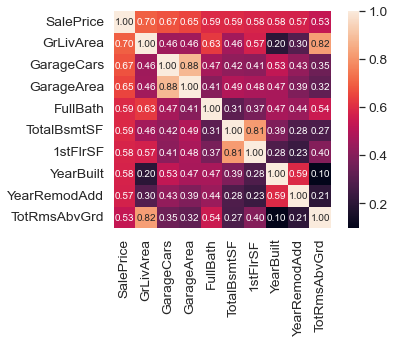

In [73]:
#saleprice correlation matrix
corrmat = dp.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(dp[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [74]:
dp['YearSinceRemodel'] = 2010 - ((dp['YearRemodAdd'] - dp['YearBuilt']) + dp['YearBuilt']) #feature engineering

In [75]:
Cat1 = dp.select_dtypes(include=['object']) #checking all categorical columns to form dummy variables
Cat1.columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish', 'SaleCondition'],
      dtype='object')

In [76]:
Num = dp.select_dtypes(include=['int64','float64']) #all numerical variables
Num.columns

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
       'YearSinceRemodel'],
      dtype='object')

In [77]:
Num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1168 non-null   int64  
 1   LotFrontage       1168 non-null   float64
 2   LotArea           1168 non-null   int64  
 3   YearBuilt         1168 non-null   int64  
 4   YearRemodAdd      1168 non-null   int64  
 5   MasVnrArea        1168 non-null   float64
 6   BsmtFinSF1        1168 non-null   int64  
 7   BsmtFinSF2        1168 non-null   int64  
 8   BsmtUnfSF         1168 non-null   int64  
 9   TotalBsmtSF       1168 non-null   int64  
 10  1stFlrSF          1168 non-null   int64  
 11  2ndFlrSF          1168 non-null   int64  
 12  LowQualFinSF      1168 non-null   int64  
 13  GrLivArea         1168 non-null   int64  
 14  BsmtFullBath      1168 non-null   int64  
 15  BsmtHalfBath      1168 non-null   int64  
 16  FullBath          1168 non-null   int64  


In [78]:
Cat1 = pd.get_dummies(Cat1,drop_first=True)  # Dummy variables
print(Cat1.shape)

(1168, 130)


In [79]:
Cat1.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,...,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [80]:
# concat dummy variables with main dataset
dp = pd.concat([dp, Cat1], axis=1) 

In [81]:
dp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,...,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,127,1-STORY PUD (Planned Unit Development) - 1946 ...,RL,70.0,4928,IR1,Inside,NPkVill,TwnhsE,1Story,Above Average,Average,1976,1976,Gable,Plywood,Plywood,None,0.0,TA,CBlock,Gd,No,ALQ,120,0,958,1078,TA,958,0,0,958,0,0,2,0,2,1,TA,5,1,Attchd,1977.0,RFn,2,440,0,205,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
1,889,1-STORY 1946 & NEWER ALL STYLES,RL,95.0,15865,IR1,Inside,NAmes,1Fam,1Story,Very Good,Above Average,1970,1970,Others,Wd Sdng,Wd Sdng,None,0.0,Gd,PConc,TA,Gd,ALQ,351,823,1043,2217,Ex,2217,0,0,2217,1,0,2,0,4,1,Gd,8,1,Attchd,1970.0,Unf,2,621,81,207,0,...,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
2,793,2-STORY 1946 & NEWER,RL,92.0,9920,IR1,CulDSac,NoRidge,1Fam,2Story,Good,Average,1996,1997,Gable,MetalSd,MetalSd,None,0.0,Gd,PConc,Gd,Av,GLQ,862,0,255,1117,Ex,1127,886,0,2013,1,0,2,1,3,1,TA,8,1,Attchd,1997.0,Unf,2,455,180,130,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
3,110,1-STORY 1946 & NEWER ALL STYLES,RL,105.0,11751,IR1,Inside,NWAmes,1Fam,1Story,Above Average,Above Average,1977,1977,Hip,Plywood,Plywood,BrkFace,480.0,TA,CBlock,Gd,No,BLQ,705,0,1139,1844,Ex,1844,0,0,1844,0,0,2,0,3,1,TA,7,1,Attchd,1977.0,RFn,2,546,0,122,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
4,422,1-STORY 1946 & NEWER ALL STYLES,RL,70.0,16635,IR1,FR2,NWAmes,1Fam,1Story,Above Average,Good,1977,2000,Gable,CemntBd,CmentBd,Stone,126.0,Gd,CBlock,Gd,No,ALQ,1246,0,356,1602,Gd,1602,0,0,1602,0,1,2,0,3,1,Gd,8,1,Attchd,1977.0,Fin,2,529,240,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [82]:
dp.drop(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish',
       'SaleCondition','Id','OverallCond','MSSubClass','OverallQual'],axis=1,inplace=True) #removing columns as dummy variables already formed

In [83]:
dp.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,YearSinceRemodel,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Others,...,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,70.0,4928,1976,1976,0.0,120,0,958,1078,958,0,0,958,0,0,2,0,2,1,5,1,1977.0,2,440,0,205,0,0,0,0,0,2,2007,11.759786,34,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
1,95.0,15865,1970,1970,0.0,351,823,1043,2217,2217,0,0,2217,1,0,2,0,4,1,8,1,1970.0,2,621,81,207,0,0,224,0,0,10,2007,12.498742,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
2,92.0,9920,1996,1997,0.0,862,0,255,1117,1127,886,0,2013,1,0,2,1,3,1,8,1,1997.0,2,455,180,130,0,0,0,0,0,6,2007,12.505399,13,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
3,105.0,11751,1977,1977,480.0,705,0,1139,1844,1844,0,0,1844,0,0,2,0,3,1,7,1,1977.0,2,546,0,122,0,0,0,0,0,1,2010,12.154779,33,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
4,70.0,16635,1977,2000,126.0,1246,0,356,1602,1602,0,0,1602,0,1,2,0,3,1,8,1,1977.0,2,529,240,0,0,0,0,0,0,6,2009,12.278393,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [84]:
dp.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1,inplace=True) #no need of these while making a model 

In [85]:
dp.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearSinceRemodel,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,...,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,70.0,4928,0.0,120,0,958,1078,958,0,0,958,0,0,2,0,2,1,5,1,2,440,0,205,0,0,0,0,0,2,11.759786,34,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
1,95.0,15865,0.0,351,823,1043,2217,2217,0,0,2217,1,0,2,0,4,1,8,1,2,621,81,207,0,0,224,0,0,10,12.498742,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
2,92.0,9920,0.0,862,0,255,1117,1127,886,0,2013,1,0,2,1,3,1,8,1,2,455,180,130,0,0,0,0,0,6,12.505399,13,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
3,105.0,11751,480.0,705,0,1139,1844,1844,0,0,1844,0,0,2,0,3,1,7,1,2,546,0,122,0,0,0,0,0,1,12.154779,33,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
4,70.0,16635,126.0,1246,0,356,1602,1602,0,0,1602,0,1,2,0,3,1,8,1,2,529,240,0,0,0,0,0,0,6,12.278393,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [86]:
#Putting feature variable to X
X = dp.drop(['SalePrice'], axis=1)

X.head()


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YearSinceRemodel,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,70.0,4928,0.0,120,0,958,1078,958,0,0,958,0,0,2,0,2,1,5,1,2,440,0,205,0,0,0,0,0,2,34,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
1,95.0,15865,0.0,351,823,1043,2217,2217,0,0,2217,1,0,2,0,4,1,8,1,2,621,81,207,0,0,224,0,0,10,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
2,92.0,9920,0.0,862,0,255,1117,1127,886,0,2013,1,0,2,1,3,1,8,1,2,455,180,130,0,0,0,0,0,6,13,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
3,105.0,11751,480.0,705,0,1139,1844,1844,0,0,1844,0,0,2,0,3,1,7,1,2,546,0,122,0,0,0,0,0,1,33,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
4,70.0,16635,126.0,1246,0,356,1602,1602,0,0,1602,0,1,2,0,3,1,8,1,2,529,240,0,0,0,0,0,0,6,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [87]:
# Putting response variable to y
y = dp['SalePrice']

y.head()

0    11.759786
1    12.498742
2    12.505399
3    12.154779
4    12.278393
Name: SalePrice, dtype: float64

In [88]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [89]:
scaler = StandardScaler()

X_train[['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces','GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal']] = scaler.fit_transform(X_train[['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces','GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal']])

X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YearSinceRemodel,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
227,-0.749375,-0.580759,-0.564640,-0.994911,-0.278136,0.637750,-0.442216,-0.753512,-0.776351,-0.121615,-1.219019,-0.809275,-0.215829,-1.047650,-0.786890,-2.288905,-0.202266,-1.603787,-0.962658,-2.372932,-2.237248,-0.780074,-0.710483,-0.349413,-0.12634,-0.263200,-0.077801,-0.080242,4,54,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
247,-2.285923,-0.929805,-0.564640,-0.994911,-0.278136,0.033907,-1.099249,-1.679883,0.633001,1.504893,-0.573160,-0.809275,-0.215829,0.750523,1.197336,-1.069847,-0.202266,-1.603787,-0.962658,0.286444,-0.001197,-0.780074,1.806157,-0.349413,-0.12634,-0.263200,-0.077801,-0.080242,7,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
811,-0.005885,-0.238089,-0.564640,-0.533544,-0.278136,0.706271,0.112300,-0.144462,-0.776351,-0.121615,-0.768244,-0.809275,-0.215829,-1.047650,-0.786890,0.149212,-0.202266,-0.341461,-0.962658,-2.372932,-2.237248,-0.780074,-0.255668,-0.349413,-0.12634,-0.263200,-0.077801,-0.080242,12,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1
1097,-0.303281,-0.192156,-0.564640,0.131632,-0.278136,-0.477861,-0.484155,-0.799575,1.178192,-0.121615,0.383316,-0.809275,-0.215829,0.750523,1.197336,0.149212,-0.202266,0.289701,-0.962658,0.286444,0.897881,0.966807,0.138504,-0.349413,-0.12634,-0.263200,-0.077801,-0.080242,5,7,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
91,-0.005885,-0.139138,1.593232,-0.994911,-0.278136,1.008193,-0.039143,-0.310799,1.956389,-0.121615,1.396613,-0.809275,-0.215829,0.750523,1.197336,0.149212,-0.202266,0.289701,0.635902,0.286444,1.978639,-0.780074,-0.028261,-0.349413,-0.12634,3.391284,-0.077801,-0.080242,9,8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

# Model Building and Evaluation
Ridge and Lasso Regression
Ridge

In [91]:
# list of alphas to tune
params = {'alpha': [0.00004,0.0001, 0.001, 0.01, 0.1, 10,100,1000]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [4e-05, 0.0001, 0.001, 0.01, 0.1, 10, 100,
                                   1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [92]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.034398,0.024954,0.007600,0.002242,0.00004,{'alpha': 4e-05},0.868415,0.871744,0.908120,0.811151,0.905071,0.872900,0.034957,6,0.934190,0.935968,0.926982,0.944594,0.925975,0.933542,0.006764
1,0.013600,0.003771,0.004598,0.001202,0.0001,{'alpha': 0.0001},0.868416,0.871745,0.908121,0.811153,0.905073,0.872902,0.034956,5,0.934190,0.935968,0.926982,0.944594,0.925975,0.933542,0.006764
2,0.010600,0.000489,0.004596,0.000489,0.001,{'alpha': 0.001},0.868438,0.871756,0.908143,0.811187,0.905099,0.872924,0.034953,4,0.934190,0.935968,0.926982,0.944594,0.925975,0.933542,0.006764
3,0.010400,0.000488,0.004596,0.000490,0.01,{'alpha': 0.01},0.868642,0.871863,0.908352,0.811512,0.905340,0.873142,0.034919,3,0.934189,0.935967,0.926981,0.944593,0.925973,0.933540,0.006764
4,0.013796,0.006112,0.004598,0.000800,0.1,{'alpha': 0.1},0.870174,0.872711,0.910109,0.813948,0.906970,0.874782,0.034671,2,0.934103,0.935906,0.926908,0.944515,0.925882,0.933463,0.006767


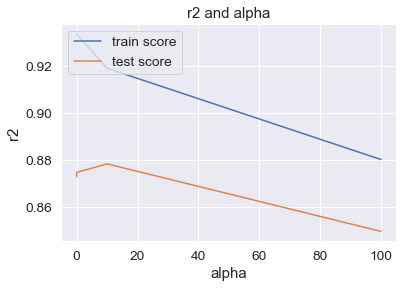

In [93]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [94]:
#optimum alpha

alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 2.07822085e-04,  1.51215928e-06,  2.45781771e-05,  4.59854156e-05,
        2.67489679e-05,  5.07196680e-06,  7.78063501e-05,  5.96517942e-05,
        5.52333796e-05,  3.11004693e-06,  1.17995224e-04,  2.34772888e-02,
        4.15752108e-03,  4.06213667e-02,  4.41382693e-02,  1.35922904e-02,
       -5.68229577e-02,  1.87319232e-02,  2.86964322e-02,  1.07804345e-02,
        1.96630395e-04,  1.46579606e-04, -8.85751729e-05, -3.40653699e-05,
        2.37010428e-04,  2.67947614e-04,  2.76422516e-04, -1.62217226e-06,
        1.23474358e-03, -1.63647956e-03, -4.29878159e-03, -8.18394420e-02,
        3.74620420e-02,  1.54752201e-02,  7.58394884e-03,  7.11564090e-03,
        1.22841275e-02,  2.44761031e-02,  1.97265380e-02, -4.41592038e-02,
       -4.33417906e-03, -5.84798701e-03,  8.72570733e-03,  4.33346652e-03,
       -9.03164271e-02,  1.11368736e-02, -2.31518654e-02,  2.68295674e-02,
       -1.99721042e-05,  9.99904933e-04,  4.33992688e-02, -2.29952534e-02,
        0.00000000e+00,  

In [95]:
ridge.score(X_train,y_train)

0.9172594280372248

In [96]:
ridge.score(X_test,y_test)

0.7584696093003616

In [97]:
# Ridge model parameters
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.377),
 ('LotFrontage', -0.113),
 ('LotArea', -0.1),
 ('MasVnrArea', -0.09),
 ('BsmtFinSF1', -0.082),
 ('BsmtFinSF2', -0.079),
 ('BsmtUnfSF', -0.075),
 ('TotalBsmtSF', -0.073),
 ('1stFlrSF', -0.065),
 ('2ndFlrSF', -0.062),
 ('LowQualFinSF', -0.057),
 ('GrLivArea', -0.053),
 ('BsmtFullBath', -0.049),
 ('BsmtHalfBath', -0.048),
 ('FullBath', -0.044),
 ('HalfBath', -0.04),
 ('BedroomAbvGr', -0.04),
 ('KitchenAbvGr', -0.04),
 ('TotRmsAbvGrd', -0.039),
 ('Fireplaces', -0.039),
 ('GarageCars', -0.038),
 ('GarageArea', -0.038),
 ('WoodDeckSF', -0.038),
 ('OpenPorchSF', -0.036),
 ('EnclosedPorch', -0.035),
 ('3SsnPorch', -0.034),
 ('ScreenPorch', -0.032),
 ('PoolArea', -0.032),
 ('MiscVal', -0.032),
 ('MoSold', -0.032),
 ('YearSinceRemodel', -0.029),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.029),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.028),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.028),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', -0.

# Lasso

In [98]:
params = {'alpha': [0.00006,0.0006, 0.0008, 0.001, 0.002, 0.004, 0.006, 0.008 ]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [6e-05, 0.0006, 0.0008, 0.001, 0.002, 0.004,
                                   0.006, 0.008]},
             return_train_score=True, scoring='r2', verbose=1)

In [99]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.106594,0.032426,0.010404,0.011808,0.00006,{'alpha': 6e-05},0.872582,0.874116,0.912325,0.816174,0.909419,0.876923,0.034717,2,0.933527,0.935437,0.926523,0.944035,0.925417,0.932988,0.006745
1,0.027994,0.005216,0.005204,0.000982,0.0006,{'alpha': 0.0006},0.878942,0.868518,0.922705,0.811086,0.903901,0.877030,0.038034,1,0.922100,0.923371,0.913676,0.932768,0.912612,0.920906,0.007339
2,0.035595,0.007002,0.006404,0.002415,0.0008,{'alpha': 0.0008},0.879313,0.863027,0.922815,0.806196,0.901710,0.874612,0.039736,3,0.918122,0.919224,0.909859,0.929202,0.908822,0.917046,0.007389
3,0.024793,0.003124,0.004603,0.000492,0.001,{'alpha': 0.001},0.878927,0.858699,0.921710,0.801060,0.898605,0.871800,0.041076,4,0.914099,0.915217,0.905751,0.925950,0.904976,0.913199,0.007623
4,0.023198,0.005420,0.006001,0.003030,0.002,{'alpha': 0.002},0.867381,0.840772,0.910755,0.772729,0.884723,0.855272,0.047151,5,0.895647,0.897553,0.887884,0.909718,0.889371,0.896035,0.007753


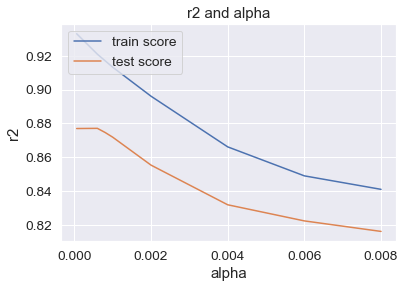

In [100]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')

plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [101]:
#optimum alpha

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [102]:
lasso.coef_

array([ 2.37621860e-04,  1.76176852e-06,  3.42890203e-05,  1.15625330e-04,
        8.59881655e-05,  6.26601902e-05,  4.51941562e-05,  1.64312496e-04,
        1.60511506e-04,  1.12579104e-04,  2.14937760e-05,  1.88692318e-02,
        0.00000000e+00,  2.95689768e-02,  3.24374705e-02,  8.66125723e-03,
       -7.22437099e-02,  1.73033118e-02,  3.12170468e-02,  9.76361770e-03,
        2.23744200e-04,  1.58872273e-04, -4.08613579e-05, -2.71985764e-05,
        2.27514203e-04,  2.99866648e-04,  2.56111280e-04, -2.63407644e-06,
        9.63827142e-04, -2.08386203e-03, -0.00000000e+00, -1.07606274e-01,
        1.07147515e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -6.85990791e-02,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.13499091e-01,  0.00000000e+00, -3.55395322e-02,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  4.05594470e-02, -0.00000000e+00,
        0.00000000e+00,  

In [103]:
lasso.score(X_train,y_train)

0.9091582357272562

In [104]:
lasso.score(X_test,y_test)

0.7400763814662782

In [105]:
# lasso model parameters
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list((zip(cols, model_parameters)))

[('constant', 11.337),
 ('LotFrontage', -0.157),
 ('LotArea', -0.123),
 ('MasVnrArea', -0.113),
 ('BsmtFinSF1', -0.108),
 ('BsmtFinSF2', -0.084),
 ('BsmtUnfSF', -0.073),
 ('TotalBsmtSF', -0.072),
 ('1stFlrSF', -0.069),
 ('2ndFlrSF', -0.068),
 ('LowQualFinSF', -0.057),
 ('GrLivArea', -0.052),
 ('BsmtFullBath', -0.041),
 ('BsmtHalfBath', -0.036),
 ('FullBath', -0.03),
 ('HalfBath', -0.028),
 ('BedroomAbvGr', -0.022),
 ('KitchenAbvGr', -0.021),
 ('TotRmsAbvGrd', -0.019),
 ('Fireplaces', -0.019),
 ('GarageCars', -0.016),
 ('GarageArea', -0.015),
 ('WoodDeckSF', -0.014),
 ('OpenPorchSF', -0.009),
 ('EnclosedPorch', -0.009),
 ('3SsnPorch', -0.008),
 ('ScreenPorch', -0.007),
 ('PoolArea', -0.005),
 ('MiscVal', -0.005),
 ('MoSold', -0.003),
 ('YearSinceRemodel', -0.003),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.002),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.002),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.002),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER'

# CONCLUSION:-

# **************DONE*****************